In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


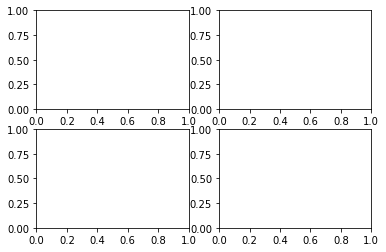

In [2]:
fig = plt.figure()
fig, ax_lst = fig.subplots(2,2)

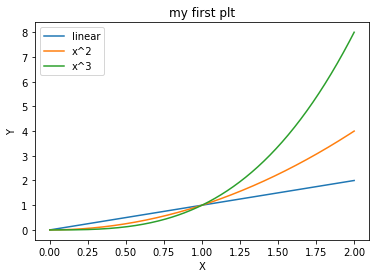

In [7]:
x = np.linspace(0,2,200)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='x^2')
plt.plot(x, x**3, label='x^3', markevery=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("my first plt")
plt.legend()
plt.show()
